In [1]:
# load libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

from action_prediction import constants as const
from action_prediction.data import DataSet
from action_prediction import visualize as vis

%load_ext autoreload
%autoreload 2

In [2]:
const.BEHAVE_DIR

PosixPath('/Users/shannonlee/Documents/action_prediction/data/behavior')

In [3]:
# initialize dataset
data = DataSet(task='social_prediction')

#load confirmed participants
df_participants = pd.read_csv("../data/behavior/confirmed_participants.csv")
df_participants = df_participants[['public_id', 'paid_full', 'sex']]
df_participants['participant'] = df_participants['sex'].map({'M': 'male', 'F': 'female'})

# load behavior
df_behav = data.load_behav()
df_behav = df_behav.merge(df_participants, left_on='subj', right_on='public_id')

# load eyetracking
df_eye = data.load_eye(data_type='events')

# merge eyetracking with behav
df_merged = data.merge_behav_eye(dataframe_behav=df_behav, dataframe_eye=df_eye)


In [4]:
df_behav["initiator_condition_name"]= df_behav["initiator"] + "_" + df_behav["condition_name"] 
df_merged["initiator_condition_name"]= df_merged["initiator"] + "_" + df_merged["condition_name"] 
#can use this method for combining variable conditions across any column
#look into label and condition, initiator + label, etc


In [5]:
df_merged.initiator_condition_name
df_behav.initiator_condition_name

0         male_hard
1       female_hard
2       female_easy
3       female_easy
4       female_easy
           ...     
7519    female_easy
7520      male_easy
7521      male_hard
7522      male_easy
7523    female_easy
Name: initiator_condition_name, Length: 7524, dtype: object

In [6]:

# initialize plotting style
vis.plotting_style()

<Figure size 600x600 with 0 Axes>

# 1. Do people learn to predict social interactions over time?

Measure accuracy, proportion correct response to our social prediction video clips, grouped by run # over time.  This graph visually suggests that there is a slight upward trend in terms of increased accuracy over the course of all runs over time, so we are now looking into the statistical significance of these outcomes.

### Fig. 1

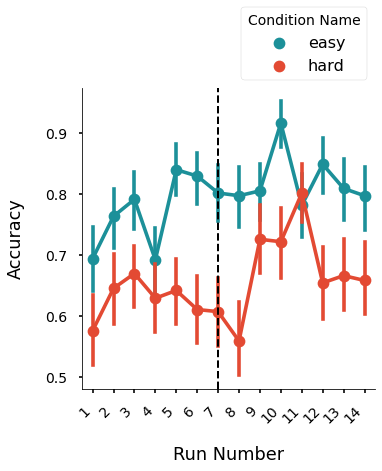

In [13]:
#visualize accuracy across runs
vis.plot_acc(dataframe=df_behav, x='run_num', 
                    hue= 'condition_name', hue_order = ['easy', 'hard'], palette = ['#1c9099', '#e34a33'],
                    x_title= "Run Number", legend_title = "Condition Name", save_title = 'posterfig1A.png')


Plot of accuracy changes over time (by run number), broken down by condition_name. Run number 8 indicates the start of the Behavioral Session 2. The hard condition reflected overall lower accuracy percentages compared to the easy condition across participants. 

In [ ]:
import pandas as pd
from scipy.stats import f_oneway
# group by whichever variables you are interested
df_grouped = df_merged.groupby(['subj', 'condition_name'])['corr_resp'].mean().reset_index()
# run an F test
# let's first run an F test (i.e. one-way ANOVA on RT diff between patient and control)
easy_acc = df_grouped.query('condition_name=="easy"')['corr_resp']
hard_acc = df_grouped.query('condition_name=="hard"')['corr_resp']
F, p = f_oneway(easy_acc, hard_acc)
print(f'F={F}, p={p}')

No handles with labels found to put in legend.


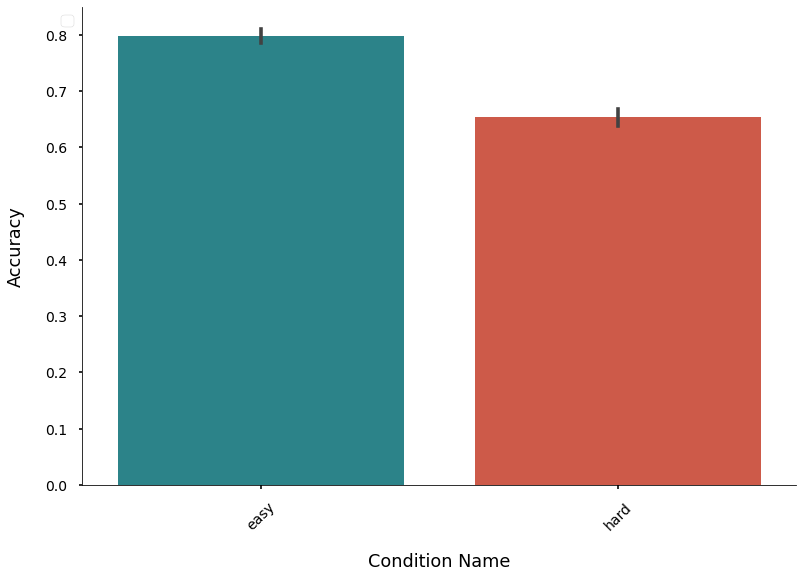

In [14]:
vis.plot_acc(dataframe=df_behav, x='condition_name', hue_order = ['easy', 'hard'], palette = ['#1c9099', '#e34a33'],
                    x_title= "Condition Name", save_title = 'posterfig1B.png')

In [16]:
import pandas as pd
from scipy.stats import ttest_ind
# group by whichever variables you are interested
df_grouped = df_merged.groupby(['subj', 'condition_name'])['corr_resp'].mean().reset_index()
# run a T-test
# let's first run a T-test (i.e. one-way ANOVA on RT diff between patient and control)
easy_acc = df_grouped.query('condition_name=="easy"')['corr_resp']
hard_acc = df_grouped.query('condition_name=="hard"')['corr_resp']
t, p = ttest_ind(easy_acc, hard_acc)
print(f't(20)={t}, p={p}')

t(20)=6.933775089163084, p=1.0614307386458154e-07


### Fig. 2

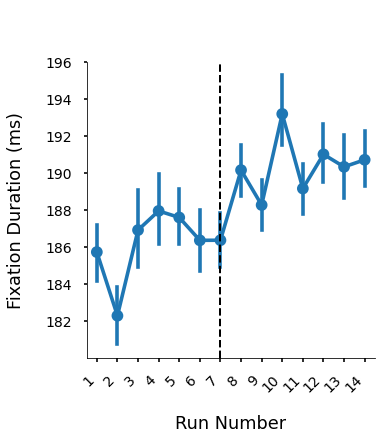

In [73]:

fig2 =vis.plot_fixation_duration(df_merged, x='run_num', hue=None, x_title ="Run Number", save_title = 'posterfig2.png')


### Consider reaction time/ accuracy tradeoff

### Fig. 3 


In [74]:
df_behav["initiator_condition_name"]= df_behav["initiator"] + "_" + df_behav["condition_name"] 
df_merged["initiator_condition_name"]= df_merged["initiator"] + "_" + df_merged["condition_name"] 
#can use this method for combining variable conditions across any column

df_behav["initiator_label"]= df_behav["initiator"] + "_" + df_behav["label"] 
df_merged["initiator_label"]= df_merged["initiator"] + "_" + df_merged["label"] 

No handles with labels found to put in legend.


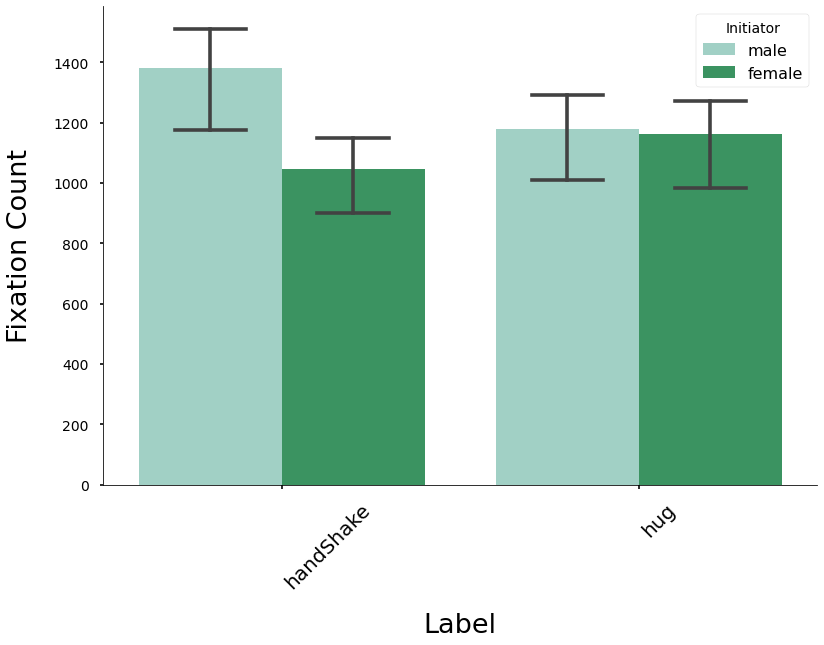

In [76]:
vis.plot_fixation_count(dataframe=df_merged, x='label', x_title='Label', hue= "initiator", legend_title='Initiator', hue_order=['male', 'female'], save_title = "posterfig3.png", palette = ['#99d8c9', '#2ca25f'])


Fixation count by label, initiator, and participant gender. Highest average fixation count for male-initiated handshake condition and lowest for female-initiated handshake condition. Features inform joint “social + eye-tracking” model


In [15]:
import pandas as pd
from scipy.stats import ttest_ind
# group by whichever variables you are interested
df_grouped = df_merged.groupby(['subj', 'condition_name'])['corr_resp'].mean().reset_index()
# run an F test
# let's first run an F test (i.e. one-way ANOVA on RT diff between patient and control)
easy_acc = df_grouped.query('condition_name=="easy"')['corr_resp']
hard_acc = df_grouped.query('condition_name=="hard"')['corr_resp']
t, p = ttest_ind(easy_acc, hard_acc)
print(f't(20)={t}, p={p}')

t(20)=6.933775089163084, p=1.0614307386458154e-07
